In [ ]:
# Detecting female and male through images 
 - first we have to colect the female and male images.
 - afret that rename the female names with 0 and male names with 1 so that we can classify them by extracting 
   0's and 1's from the names of the images.
 - once the images renamed uplod the images in one folder

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# renaming the images names of female 
# importing os module 
import os 
  
# Function to rename multiple files 

i = 0

for filename in os.listdir("./female/"): 
    dst ="0_" + str(i) + "_0.jpeg"
    src ='./female/'+ filename 
    dst ='./female/'+ dst 

    # rename() function will 
    # rename all the files 
    os.rename(src, dst) 
    i += 1



In [4]:
# importing os module 
import os 
  
# Function to rename multiple files 

i = 0

for filename in os.listdir("./male/"): 
    dst ="1_" + str(i) + "_1.jpeg"
    src ='./male/'+ filename 
    dst ='./male/'+ dst 

    # rename() function will 
    # rename all the files 
    os.rename(src, dst) 
    i += 1

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
import cv2
import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# reading all the images from the folder in which we saved our renamed images of female and male
 - and converting the images to grayand saving them in a folder 'image'

In [28]:
#Here I have a about 200 images in the below folder 'train' glob will get all the images from folder here
path = glob.glob('./renamed images/*.jpeg')
image=[]
for img in path:
    v = cv.imread(img) #It will loads all the images from a file
    blur = cv.GaussianBlur(v,(5,5),0)
    gray = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale
    image.append(gray)

In [30]:
gray.shape # gray scale has single dimention

(248, 203)

there are total 249 images are there both female and male

In [31]:
len(image)

249

- creating label varible by the names of the images using the regular expressions

In [32]:
names=os.listdir('./renamed images/')#it will get on the images names from a directory
string = ''.join(names) 
result=re.findall(r'(\d)_\d*_',string) # extracting first value of the image name.
face = list(map(int, result)) # converting the extractes string values to integer
len(face) , face

(249,
 [0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,

In [33]:
# converting the image to gray scale (single scale)

(274, 184)

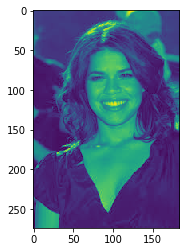

In [48]:
import cv2
img = cv2.imread('./renamed images/0_2_0.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
gray.shape

Text(0.5, 1.0, 'original Image')

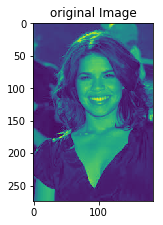

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(1,6,1)
plt.imshow(gray)
plt.title('original Image')


In [50]:
img.shape

(274, 184, 3)

## now using Cascade Classifier 'haarcascade_frontalface_default.xml'  we are extracting frontal face 
- when we apply CasCade Classifier of frontal face we get 4 parameters that is x,y,width and hight

In [65]:
face_cascade = cv2.CascadeClassifier('./xml/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
# face_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_eye.xml')

In [66]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
     
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255,0, 0), 2)
    roi_color = img[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', img) # saving image 
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)    


[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True


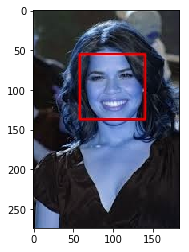

In [68]:
detected = cv2.imread('./faces_detected.jpg')
plt.imshow(detected)

In [69]:
det_face = detected[y:y+h,x:x+w]

In [70]:
cv2.imwrite('file.png',det_face)

True